# Testing performance non-regression on Grid'5000 clusters

In [1]:
csv_url = 'https://gitlab.in2p3.fr/tom.cornebize/g5k_data/raw/master/stats.csv'
cluster = 'dahu'

In [2]:
%load_ext autoreload
%autoreload 2
import requests
import pandas
import io

In [3]:
import non_regression_tests as nrt

df = nrt.format(nrt.get(csv_url))

2020-02-14 22:14:55,937 - non_regression_tests - INFO - Downloaded a dataframe with 43372 rows and 26 columns


In [4]:
df = nrt.filter(df, cluster=cluster)

2020-02-14 22:14:55,971 - non_regression_tests - INFO - Filtered the dataframe, there remains 6738 rows


In [5]:
df.head()

,function,cluster,node,cpu,jobid,start_time,expfile_hash,avg_gflops,intercept,intercept_residual,...,nk_residual,tvalue_mk,tvalue_mk_residual,tvalue_mn,tvalue_mn_residual,tvalue_mnk,tvalue_mnk_residual,tvalue_nk,tvalue_nk_residual,timestamp
0,dgemm,dahu,8,0,1870101,1560547719,cf32520fd5a1fba35b2aef2115176cc4fc122f6cff4deb...,28.877805,0.000002,2.437149e-07,...,4.469348e-11,55.454129,2.913950,6.170057,1.578953,812.881583,26.899838,89.470963,7.159150,2019-06-14 21:28:39
1,dgemm,dahu,8,1,1870101,1560547719,cf32520fd5a1fba35b2aef2115176cc4fc122f6cff4deb...,29.855755,0.000002,3.921434e-07,...,3.148164e-11,65.527023,15.986252,7.008951,5.175509,990.987085,21.848064,114.435233,19.119759,2019-06-14 21:28:39
2,dgemm,dahu,9,0,1870102,1560547725,cf32520fd5a1fba35b2aef2115176cc4fc122f6cff4deb...,29.805097,0.000002,1.956603e-07,...,2.996340e-11,65.816084,11.683131,7.258983,4.056722,999.873755,30.574336,114.988085,14.322827,2019-06-14 21:28:45
3,dgemm,dahu,9,1,1870102,1560547725,cf32520fd5a1fba35b2aef2115176cc4fc122f6cff4deb...,29.815750,0.000002,5.322692e-07,...,3.168267e-11,65.322986,14.608848,7.098248,4.323275,997.488581,22.661521,114.954386,17.596415,2019-06-14 21:28:45
4,dgemm,dahu,1,0,1870094,1560547806,cf32520fd5a1fba35b2aef2115176cc4fc122f6cff4deb...,27.760311,0.000002,3.734852e-07,...,4.443506e-11,59.809588,2.073633,6.192997,2.100520,913.573471,21.679467,100.117176,6.674402,2019-06-14 21:30:06


2020-02-14 22:14:56,127 - non_regression_tests - INFO - Filtered the dataframe, there remains 64 rows


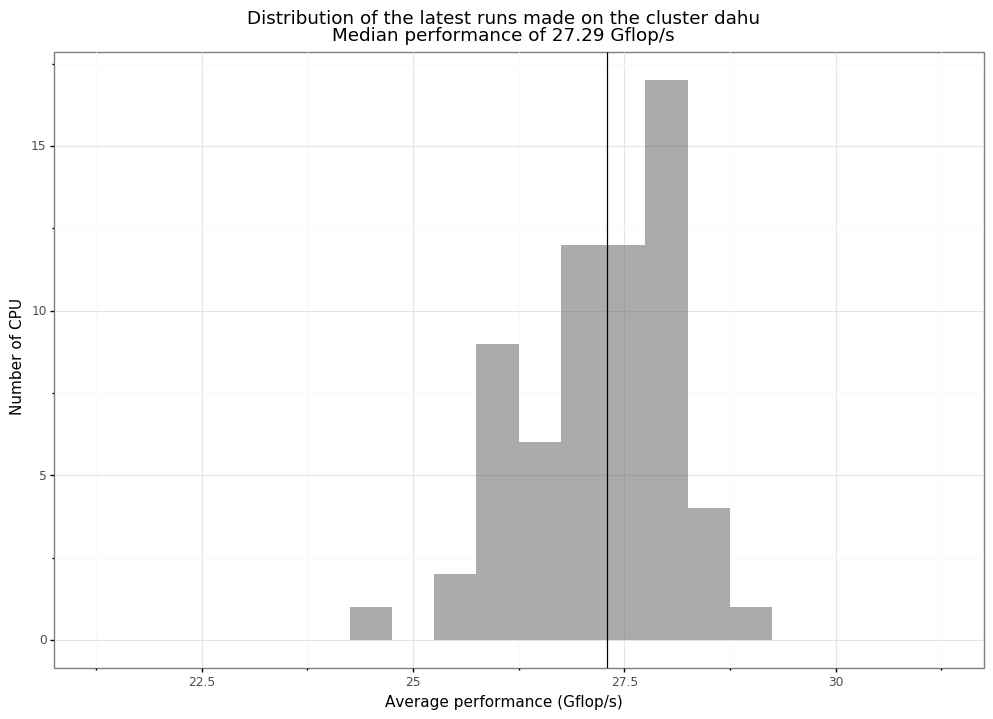

<ggplot: (-9223363247318302716)>

In [6]:
nrt.plot_latest_distribution(df)

In [7]:
marked=nrt.mark_weird(df)
marked.groupby('weird')[['timestamp']].count()

,timestamp
weird,
False,5271
True,827
NA,640


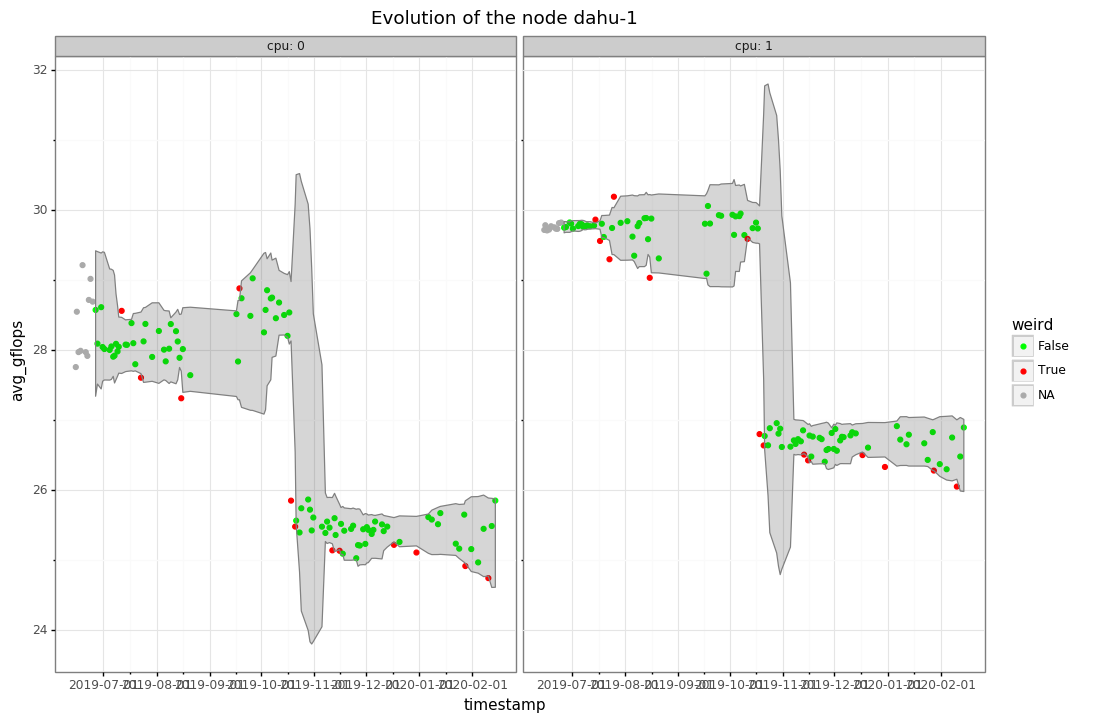

<ggplot: (8789535422973)>


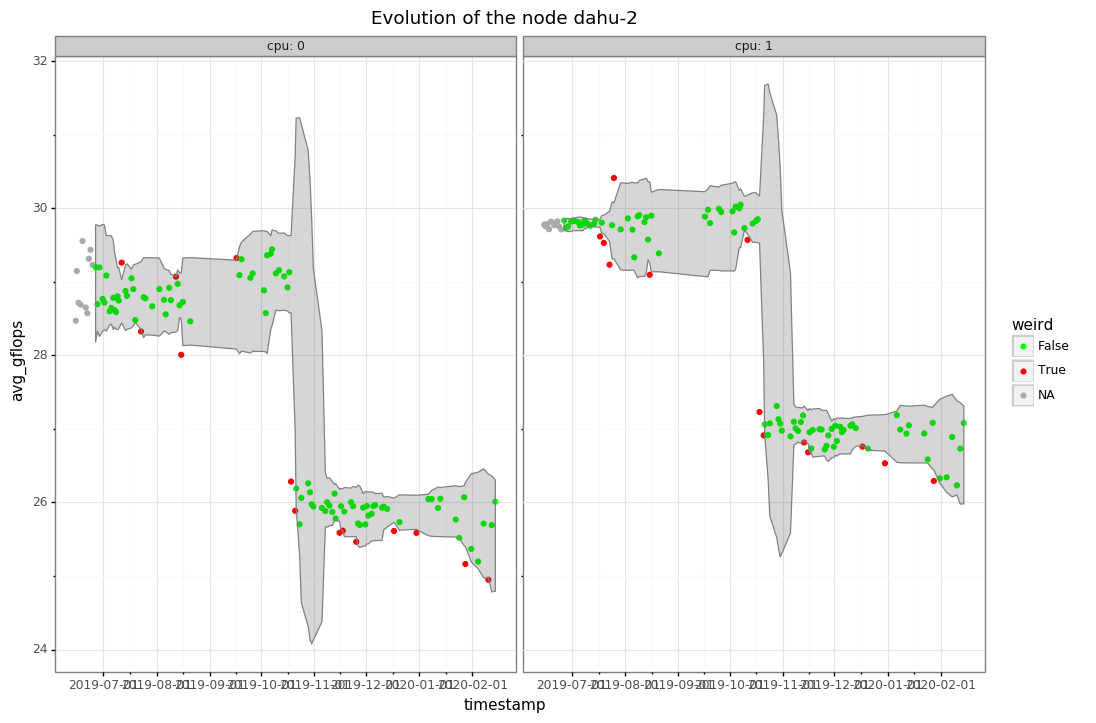

<ggplot: (-9223363247325346858)>


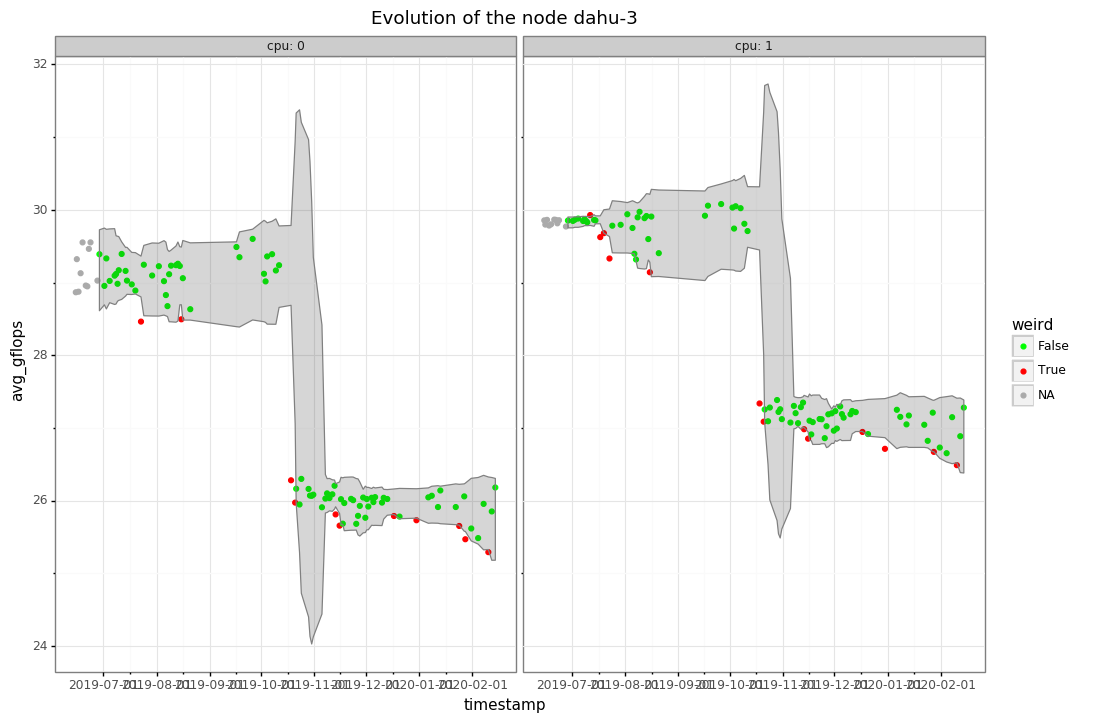

<ggplot: (8789529411946)>


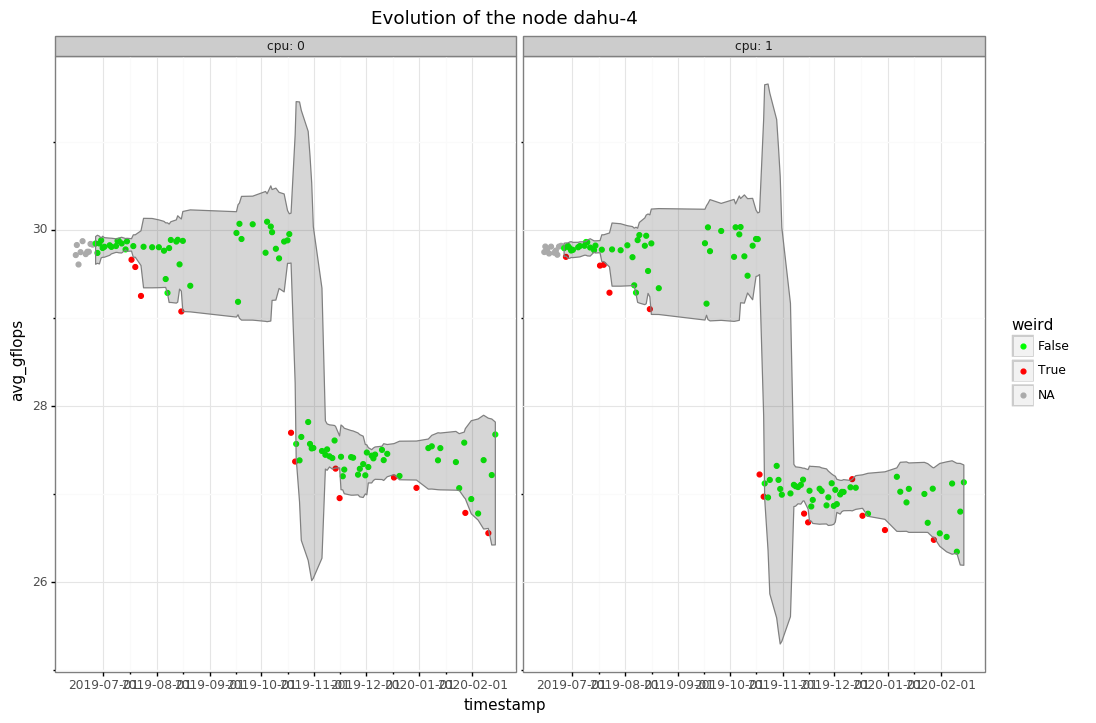

<ggplot: (-9223363247327098108)>


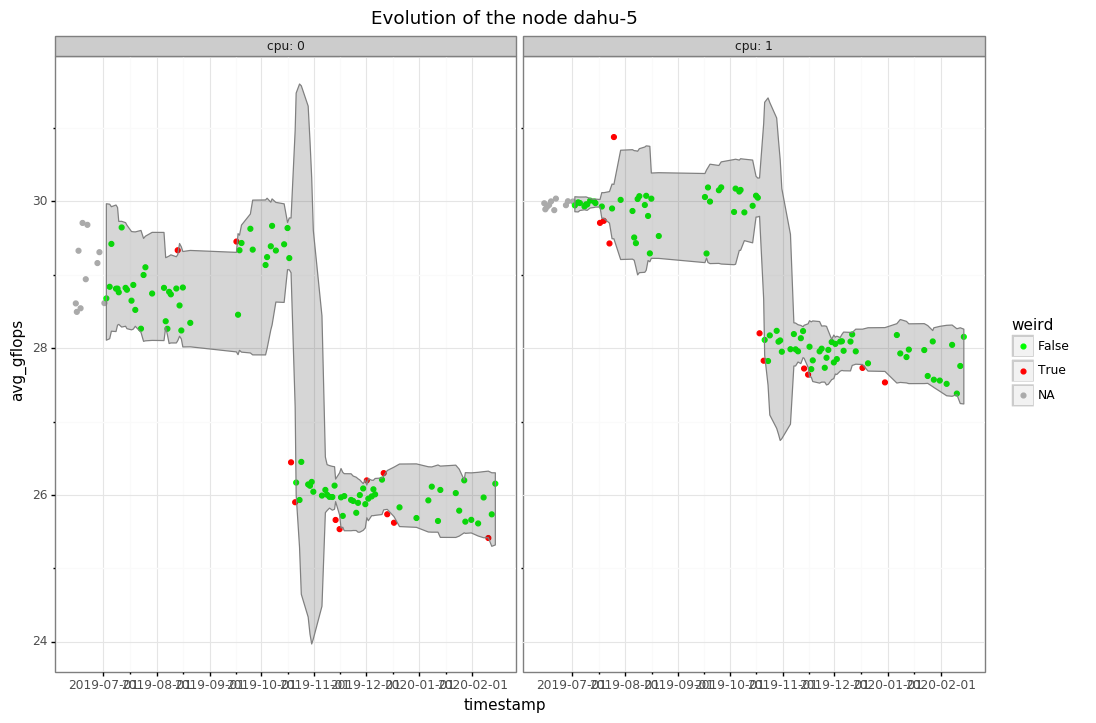

<ggplot: (-9223363247327181452)>


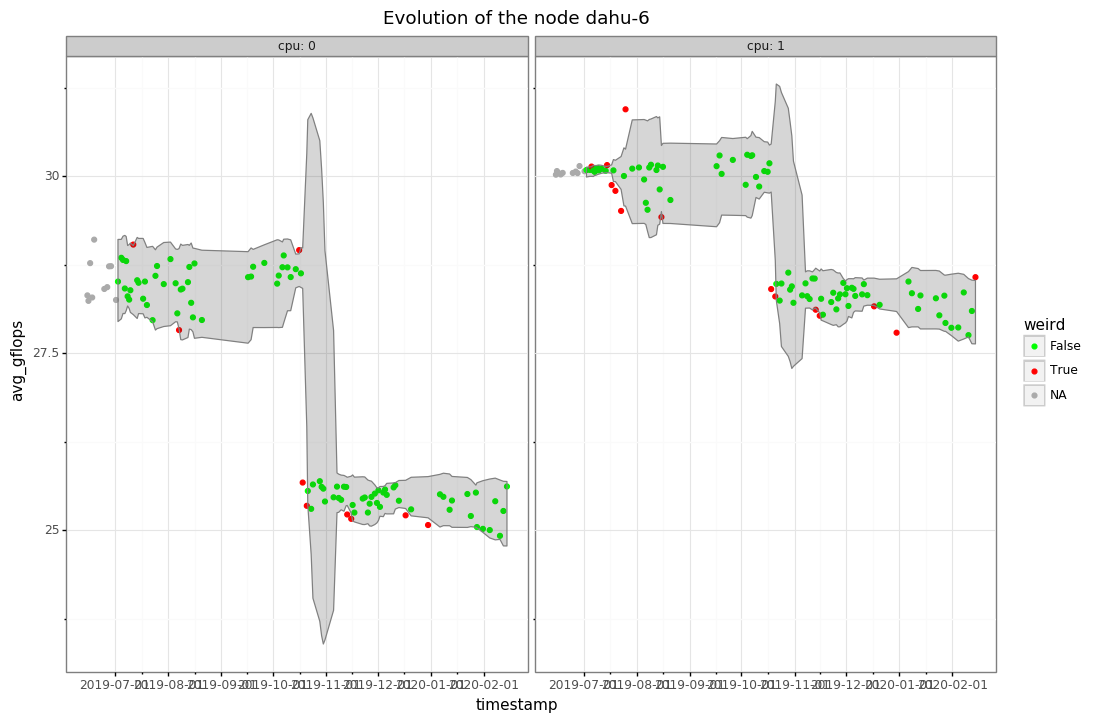

<ggplot: (-9223363247318276839)>


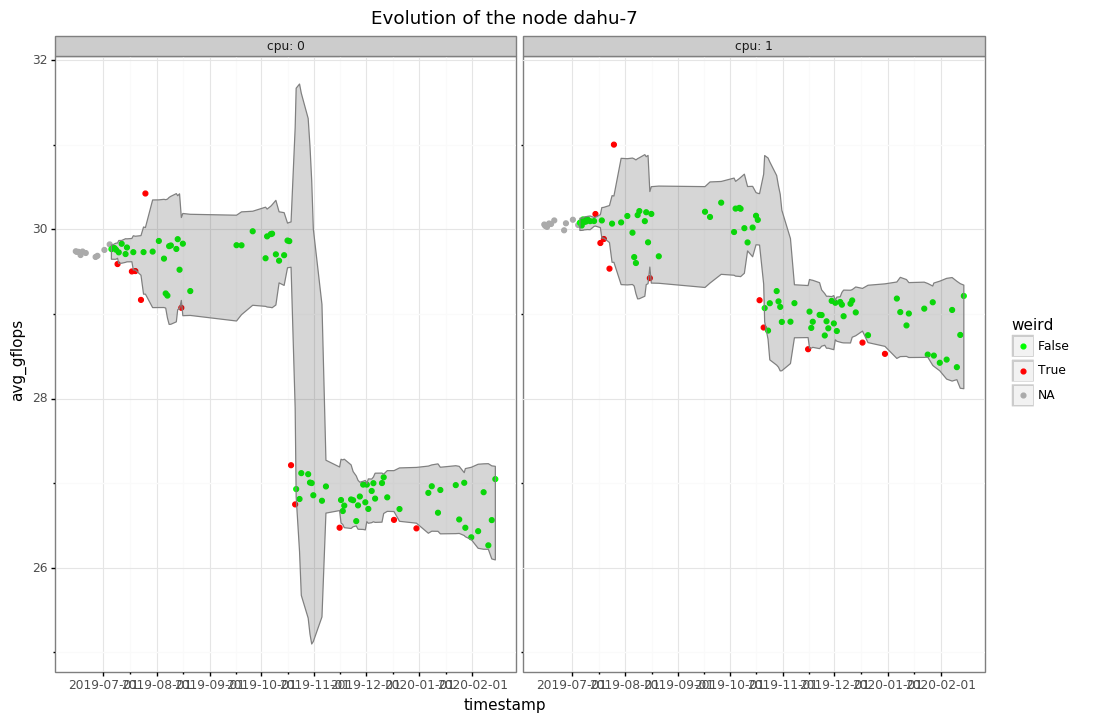

<ggplot: (-9223363247319352867)>


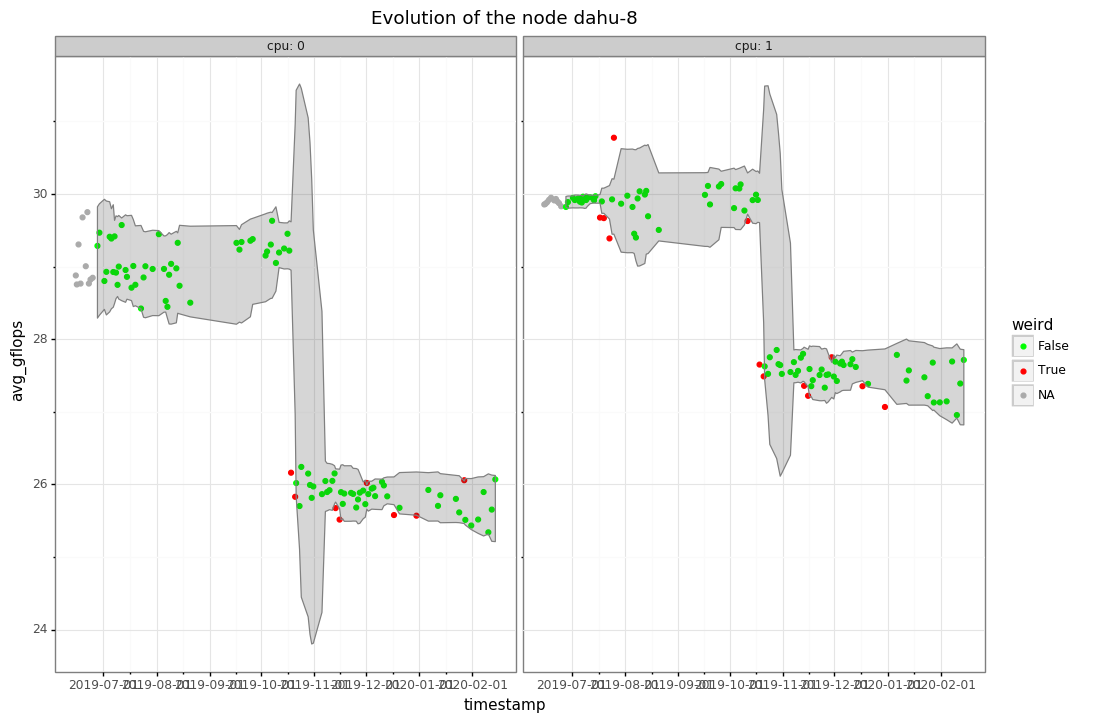

<ggplot: (-9223363247327322936)>


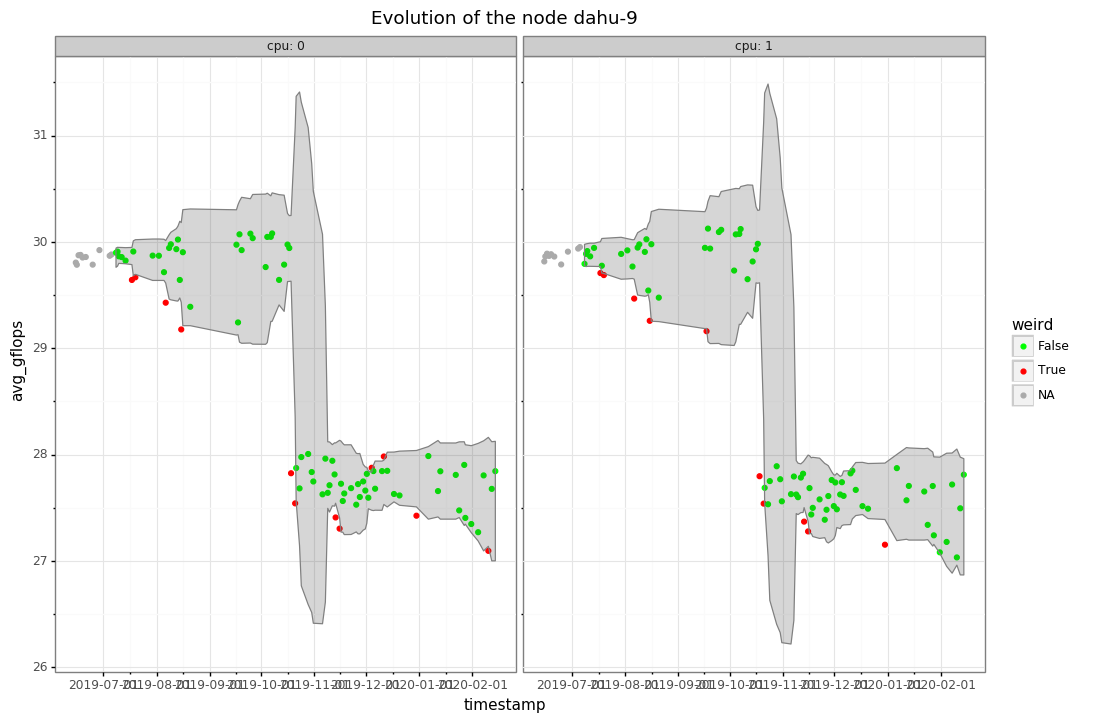

<ggplot: (-9223363247327401149)>


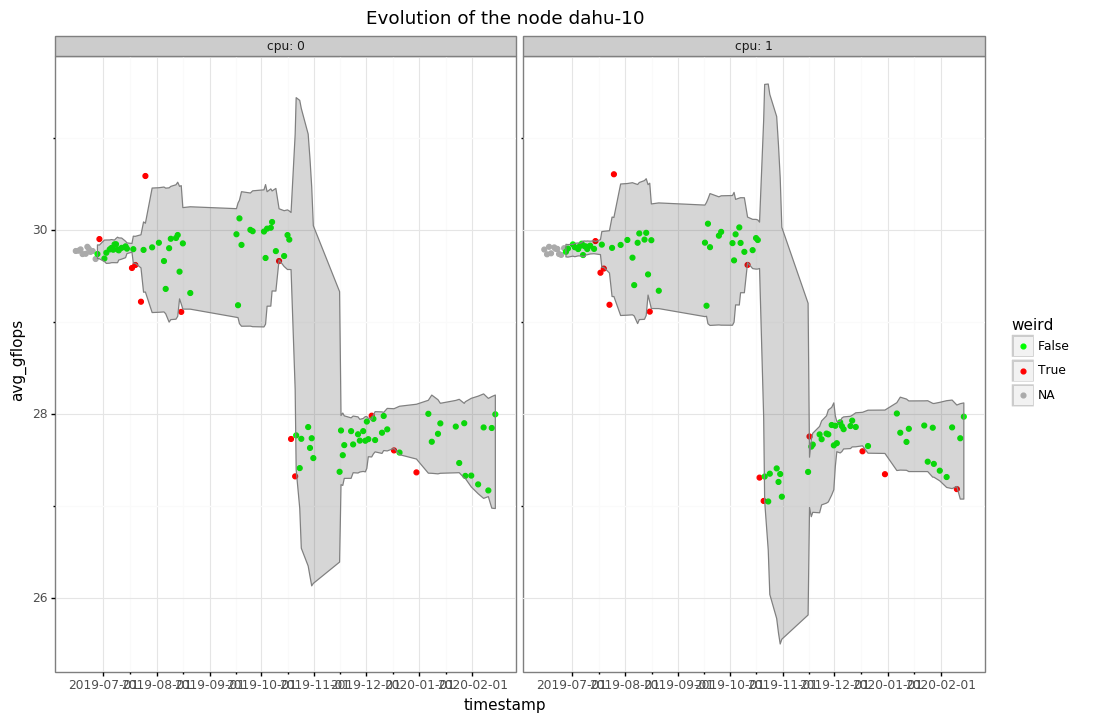

<ggplot: (8789527223721)>


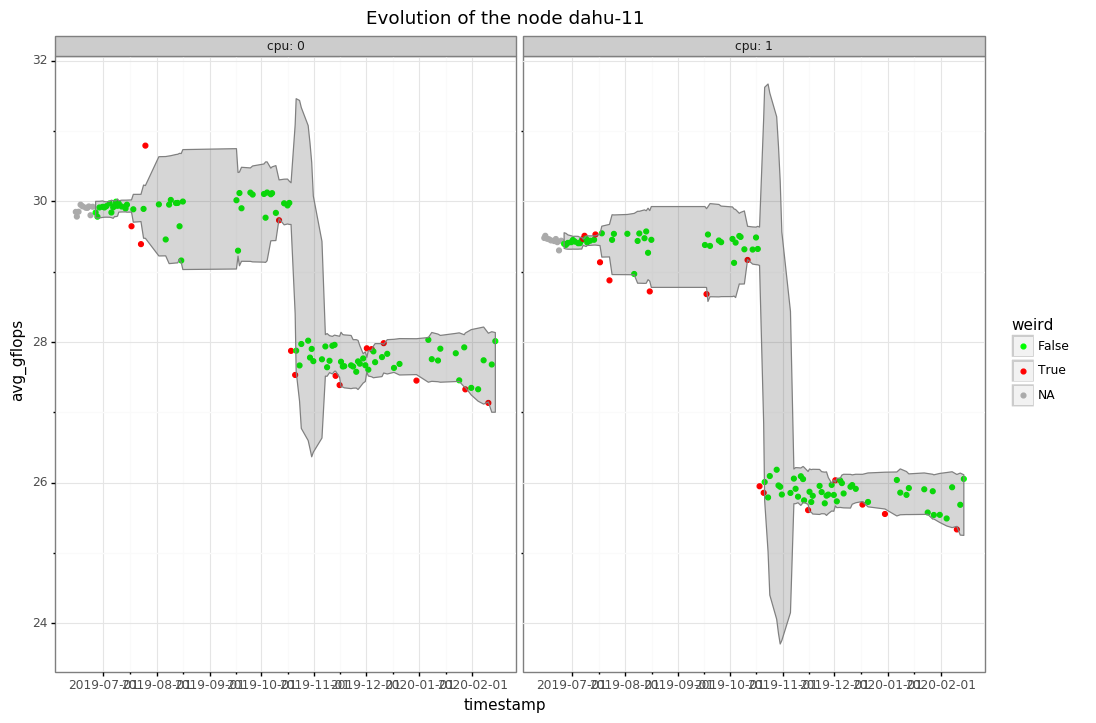

<ggplot: (8789527136306)>


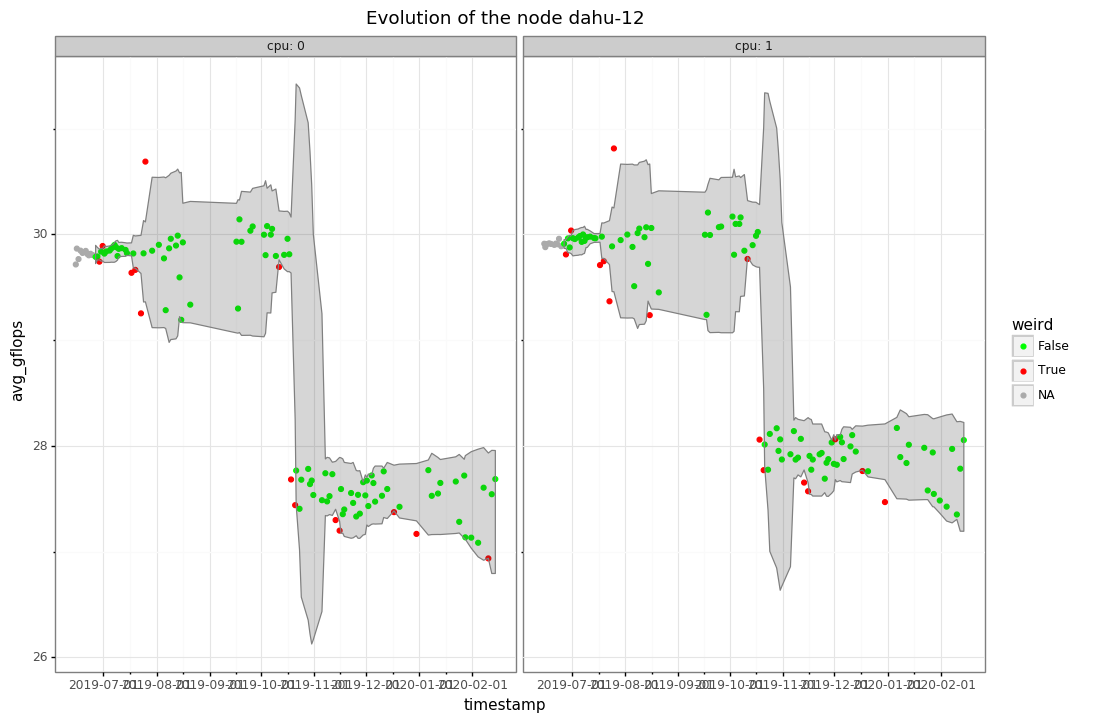

<ggplot: (-9223363247327735520)>


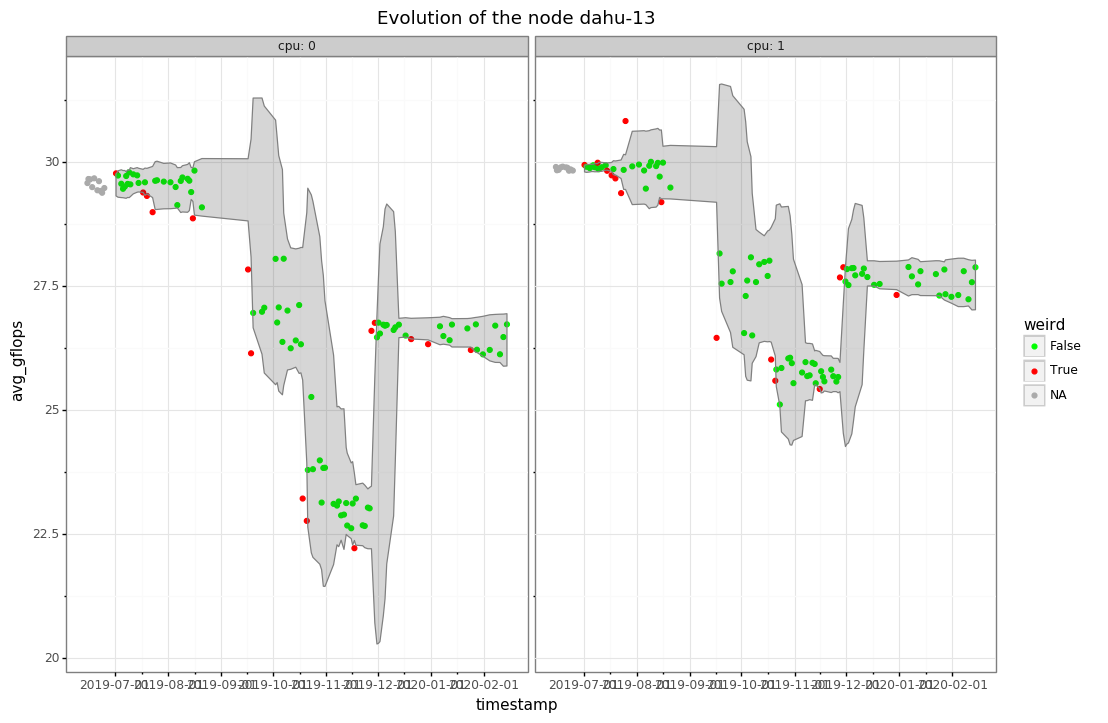

<ggplot: (8789527456092)>


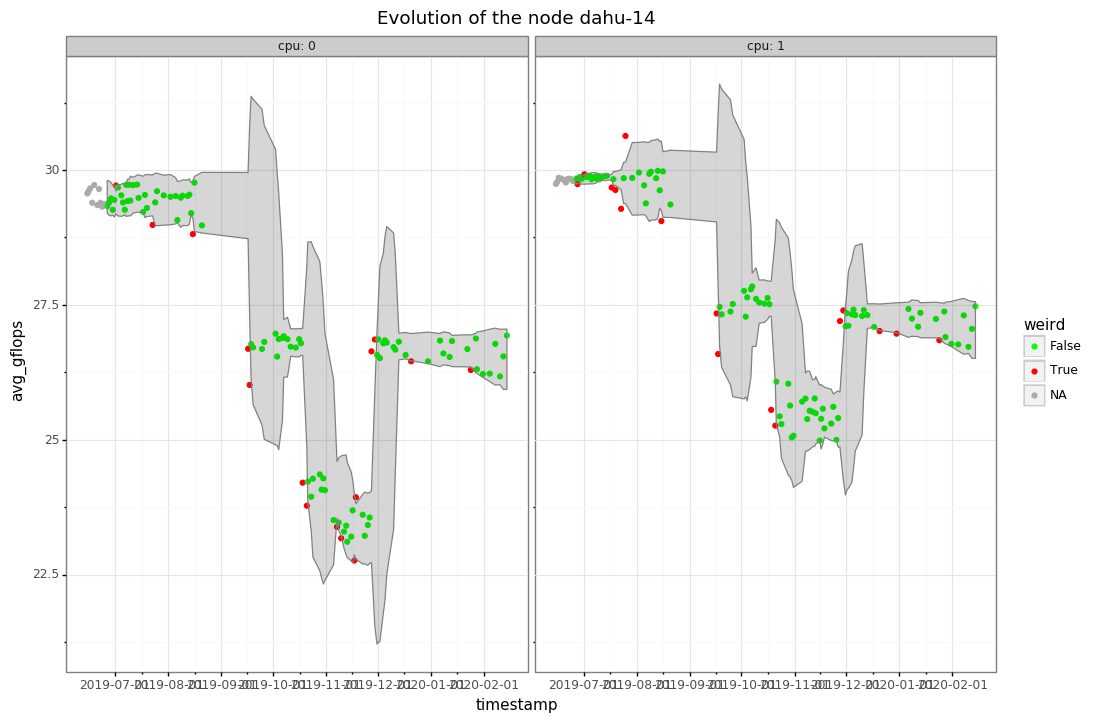

<ggplot: (8789527719586)>


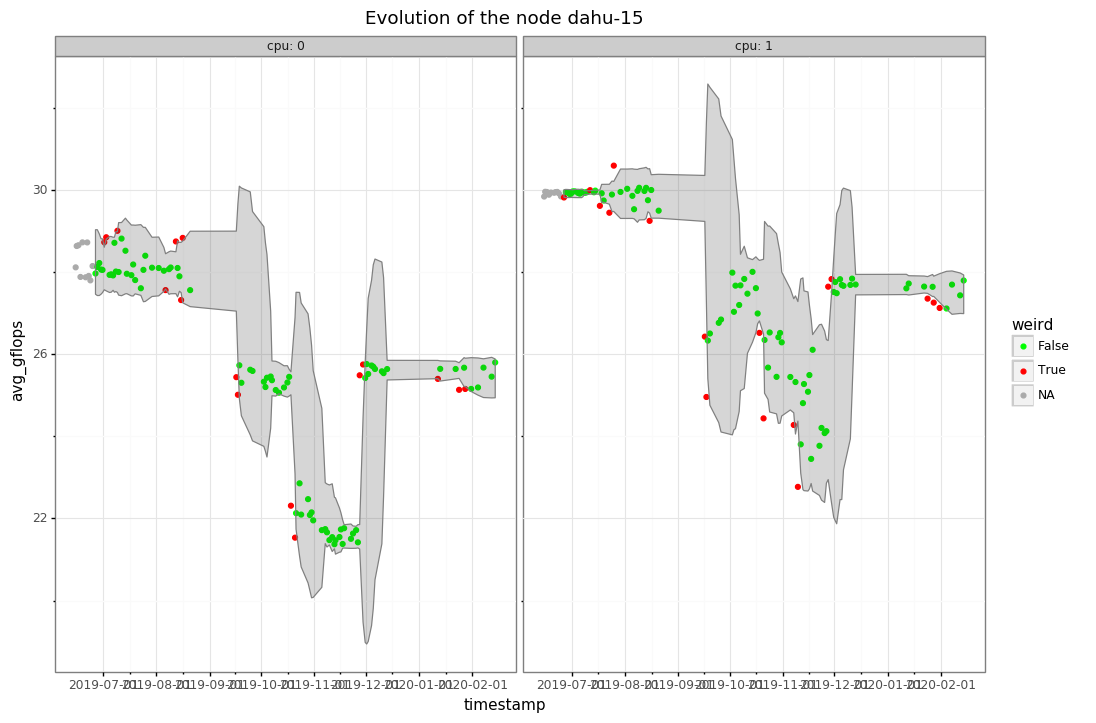

<ggplot: (8789527686962)>


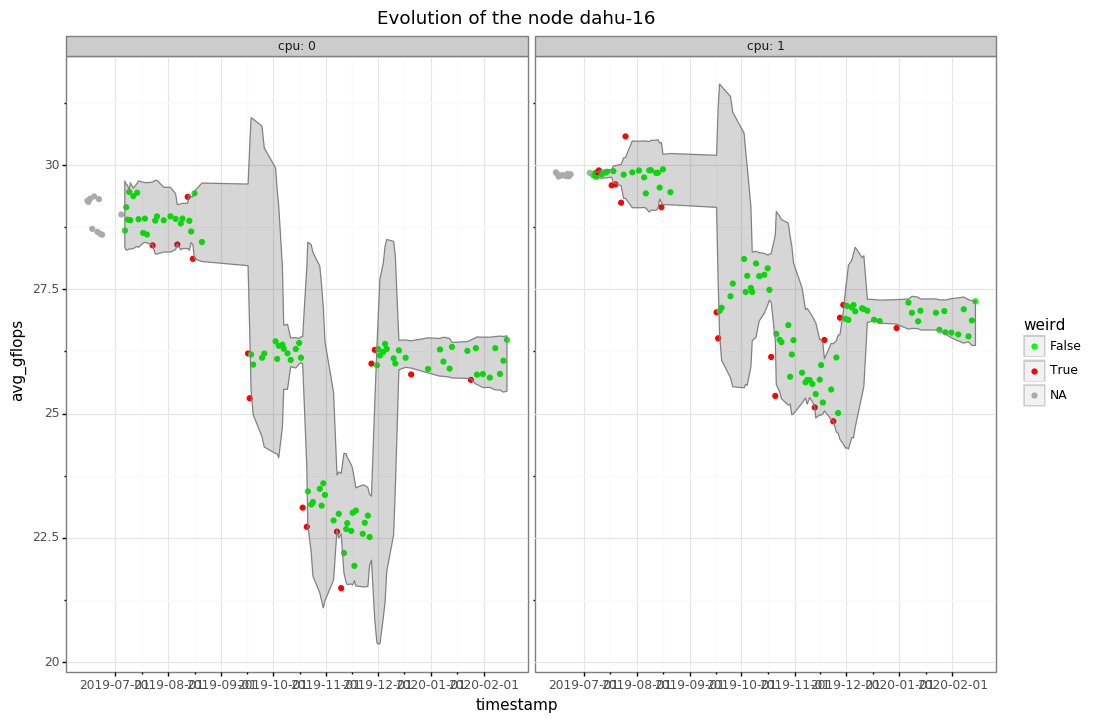

<ggplot: (8789527707768)>


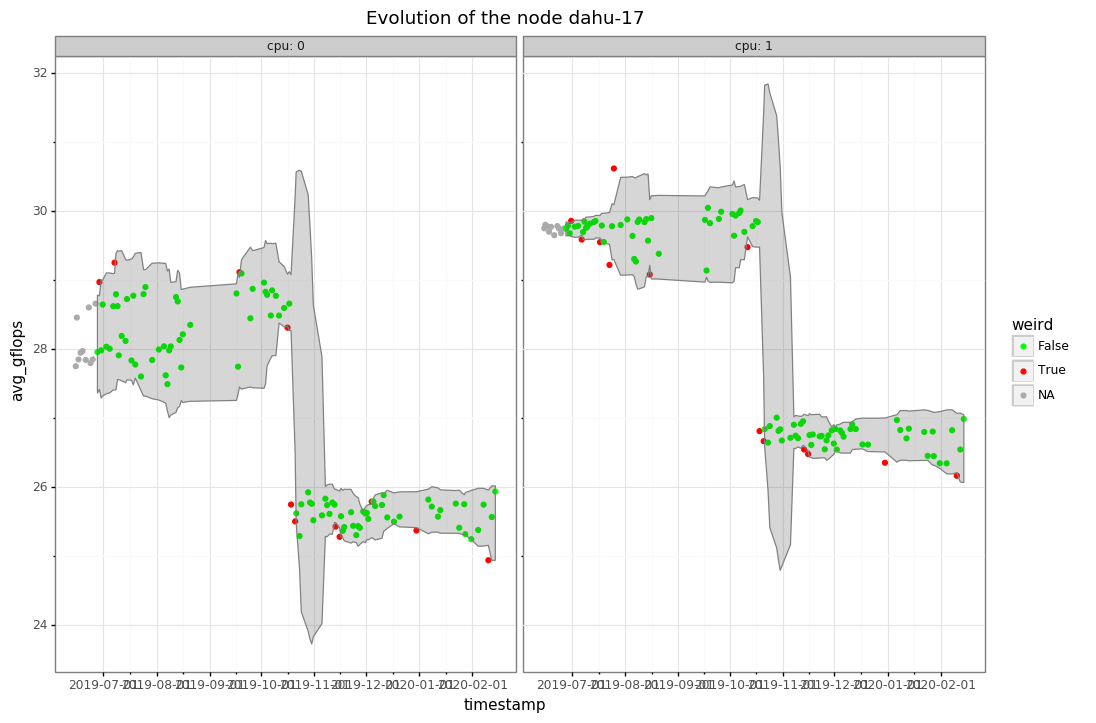

<ggplot: (8789527819556)>


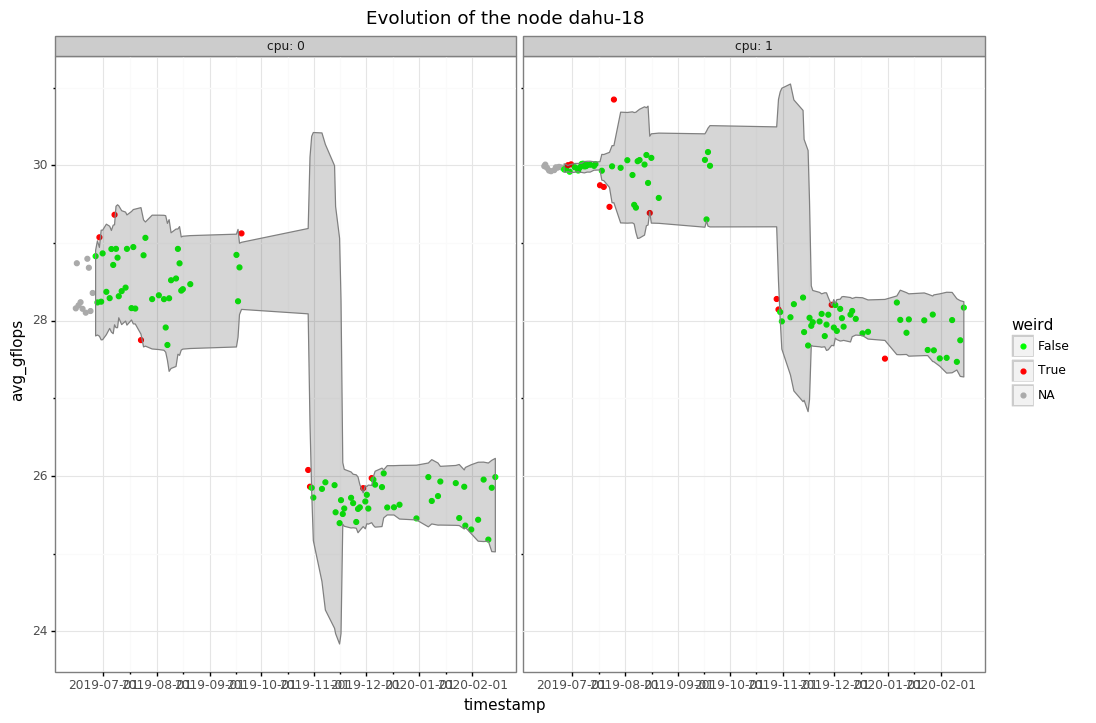

<ggplot: (-9223363247327844832)>


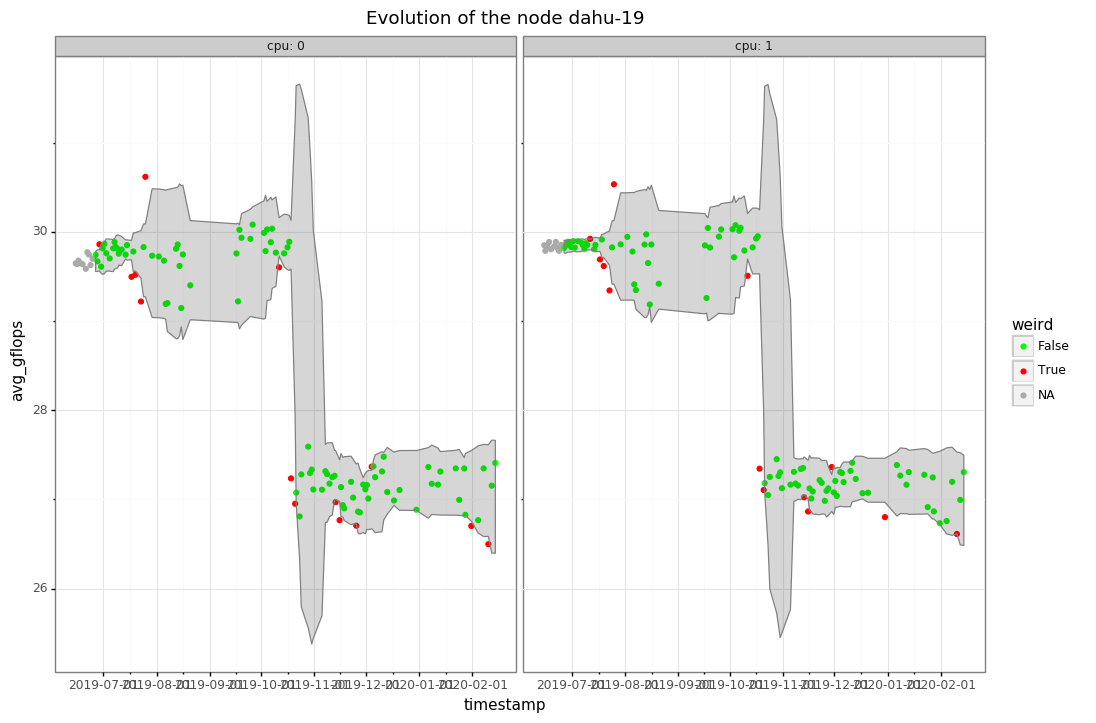

<ggplot: (-9223363247327935053)>


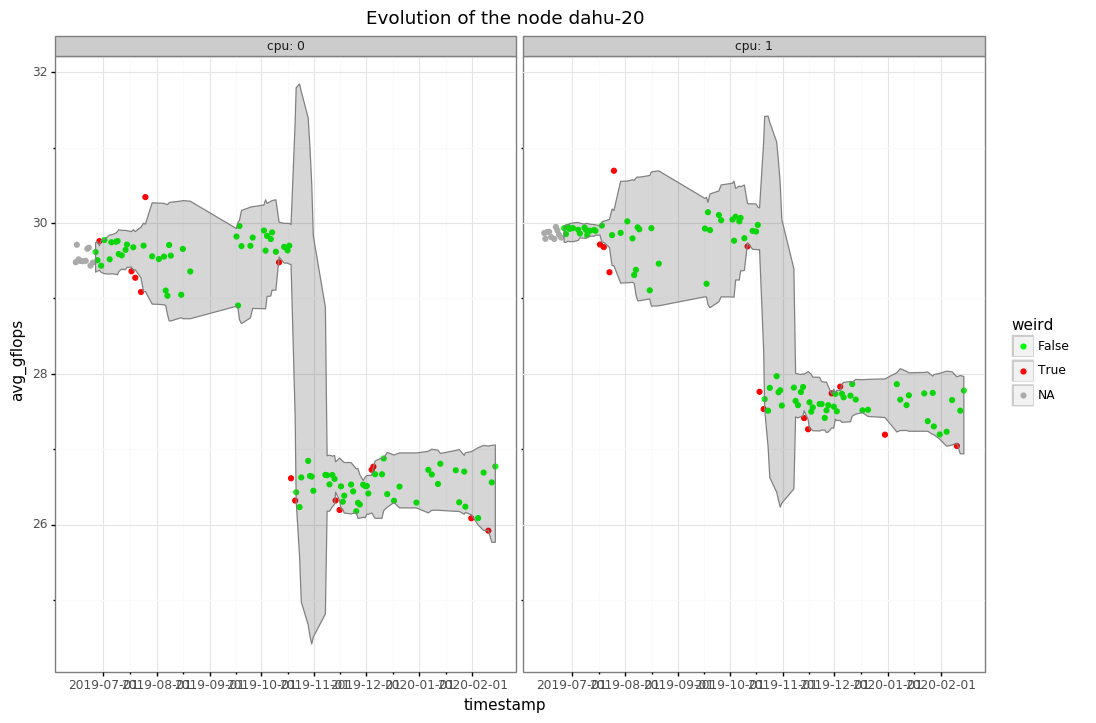

<ggplot: (8789527085611)>


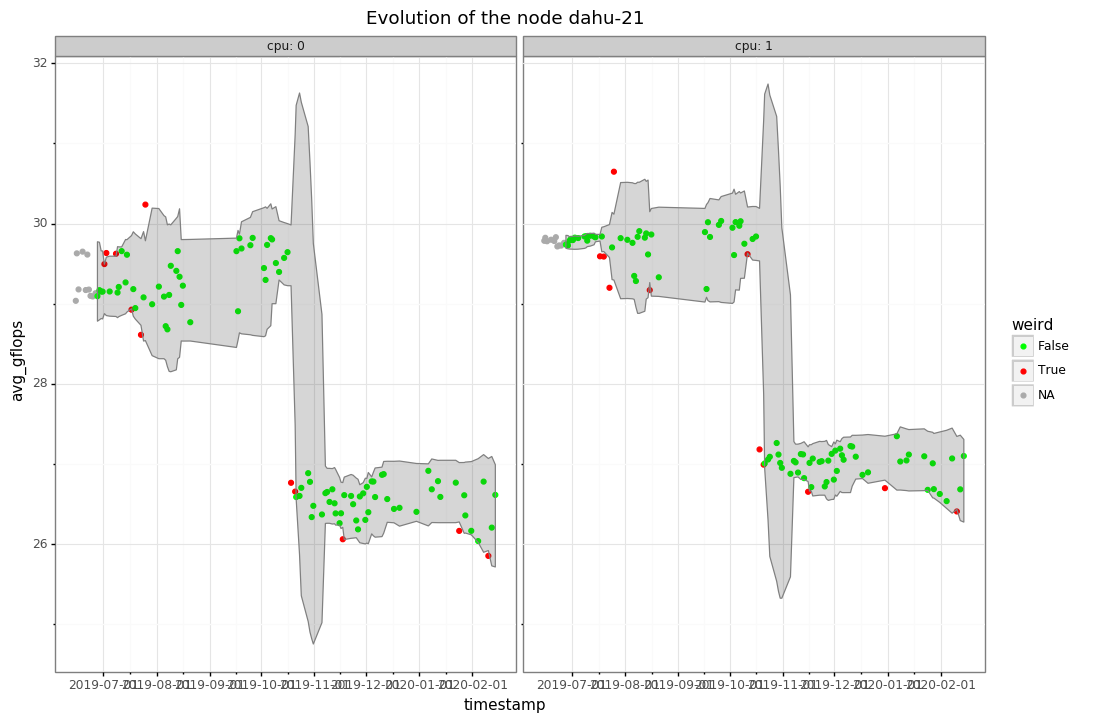

<ggplot: (-9223363247327657100)>


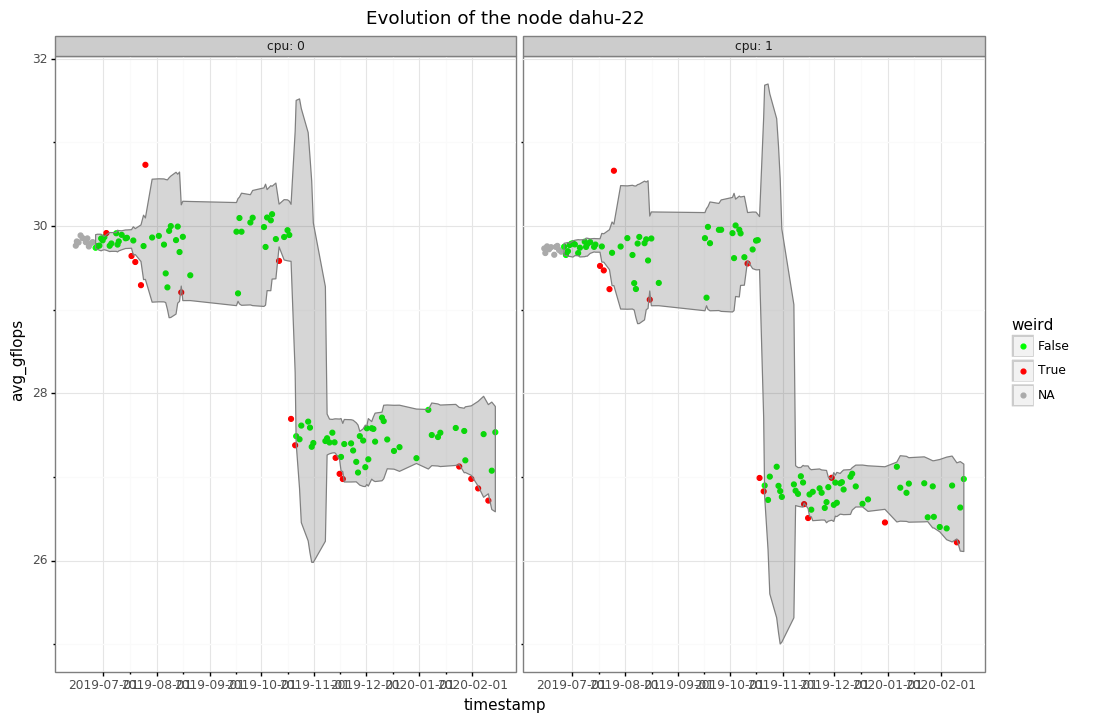

<ggplot: (-9223363247327347007)>


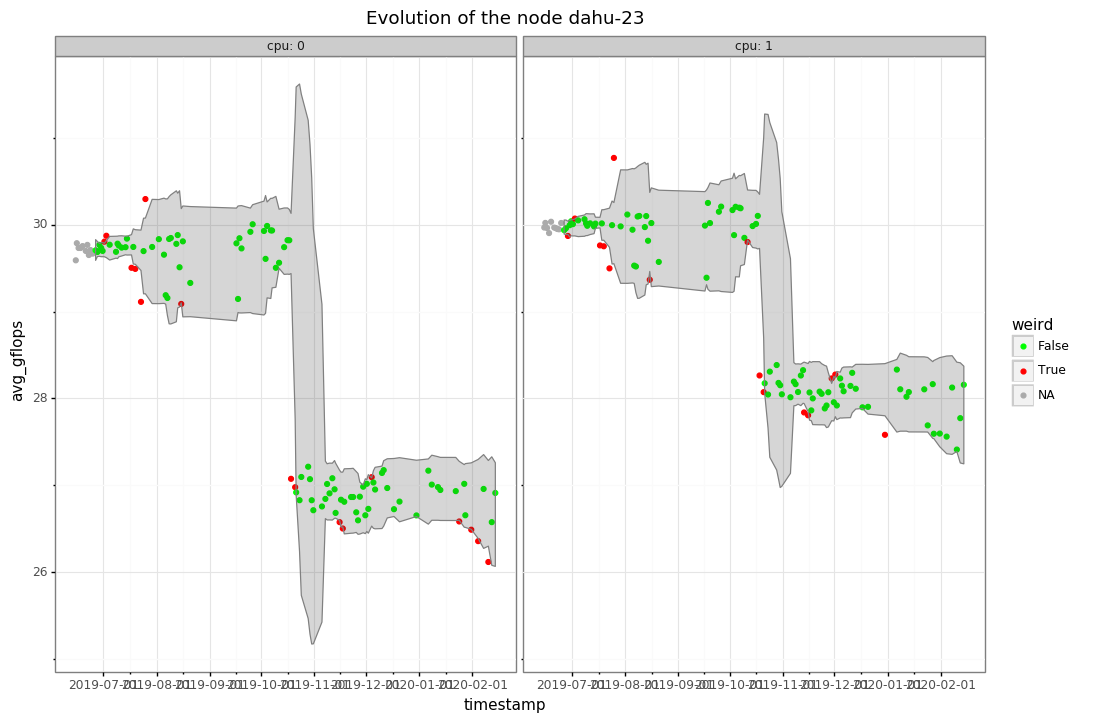

<ggplot: (-9223363247327187463)>


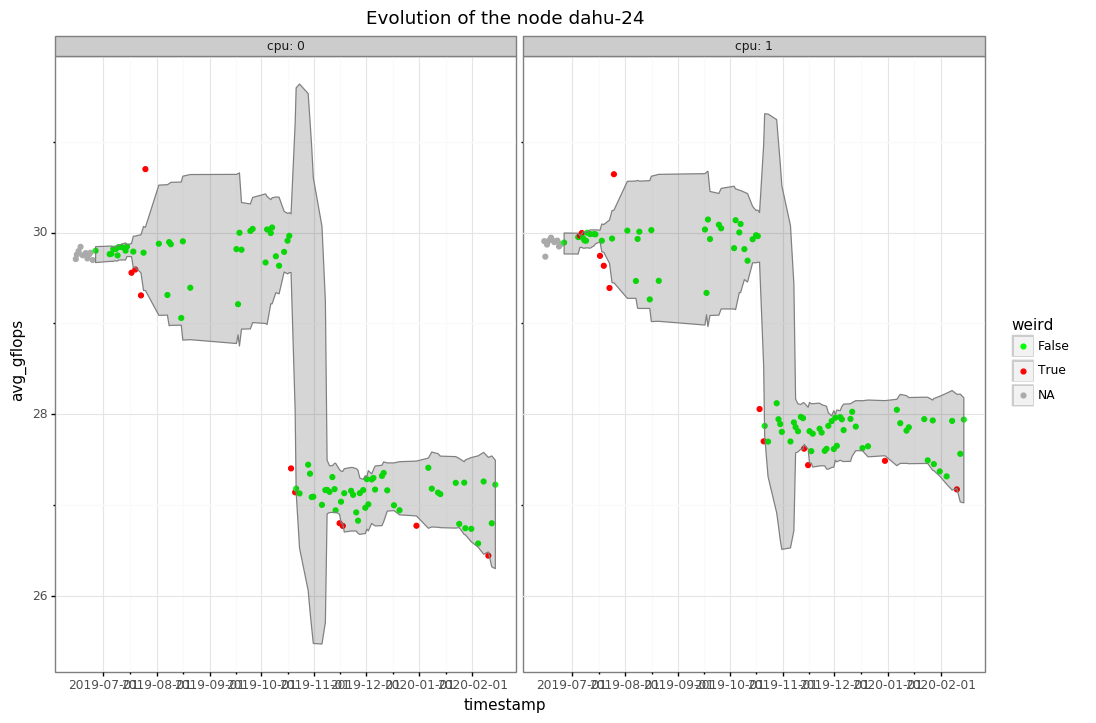

<ggplot: (8789527338686)>


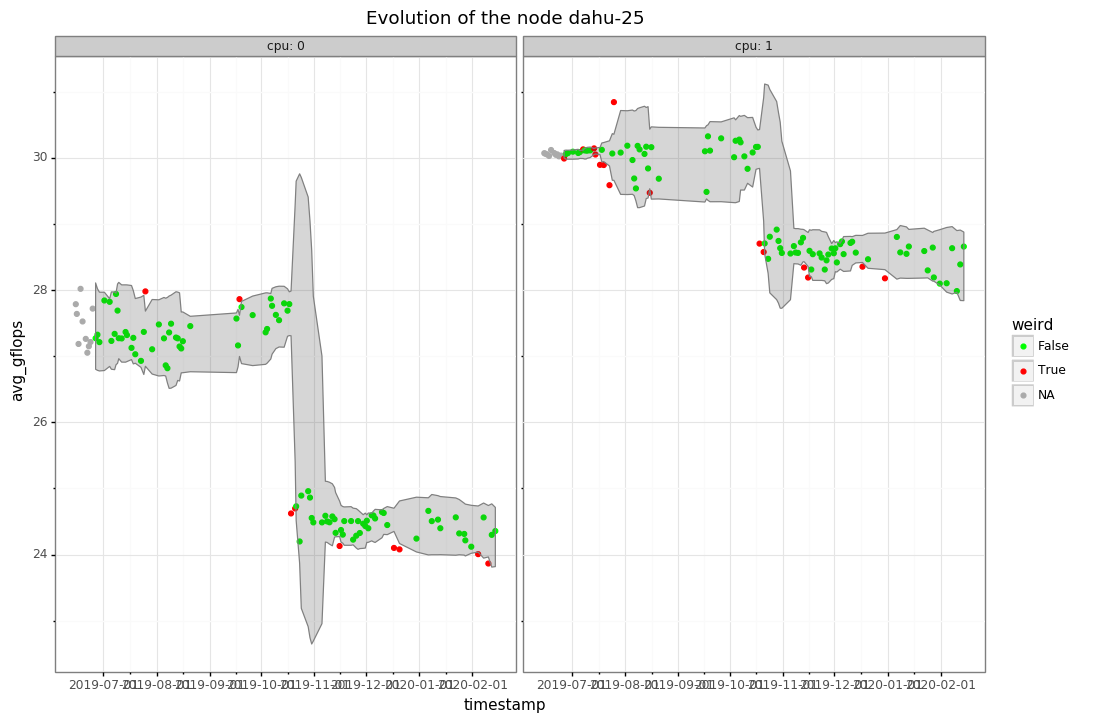

<ggplot: (-9223363247327287506)>


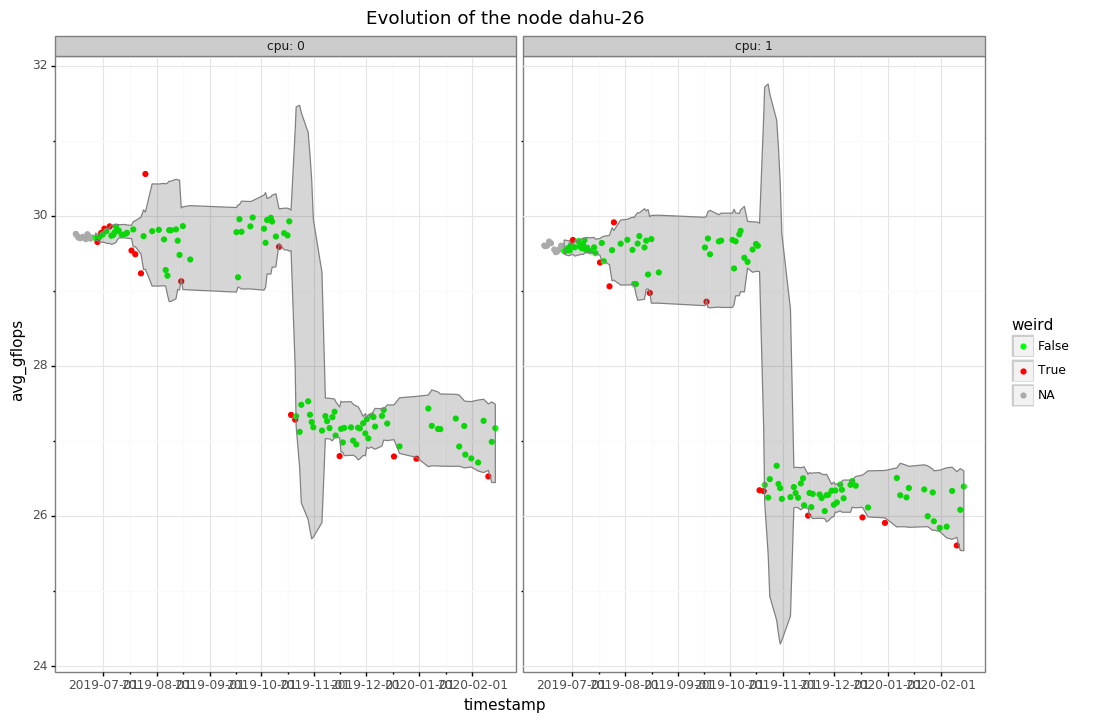

<ggplot: (-9223363247327374206)>


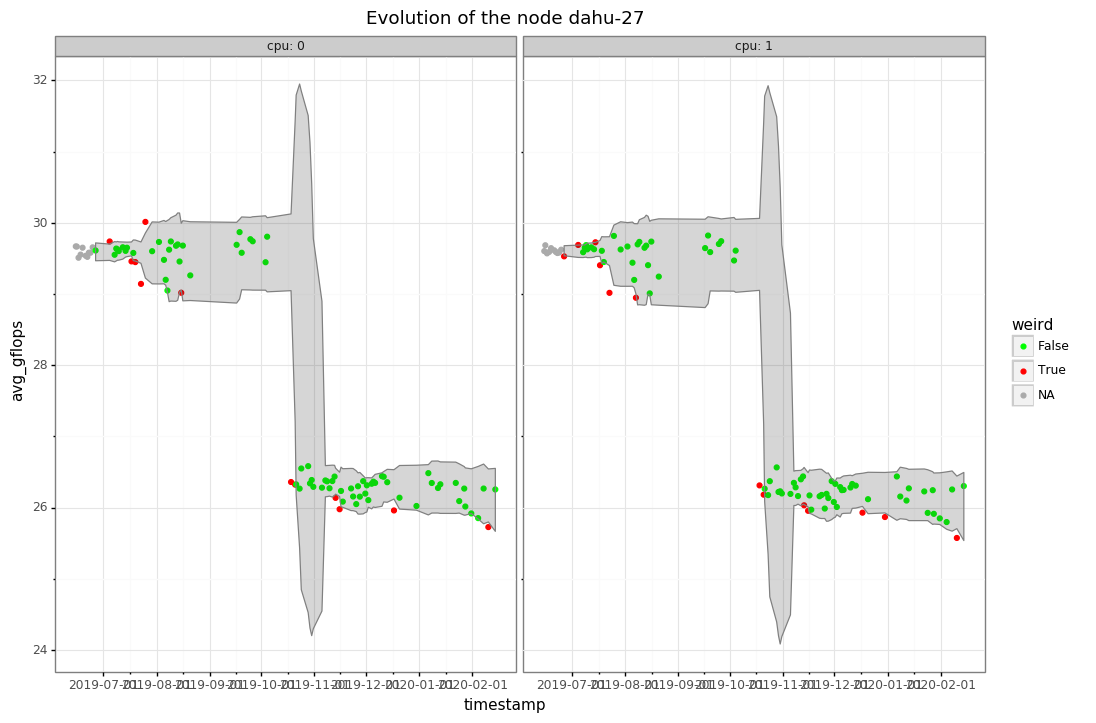

<ggplot: (-9223363247327781102)>


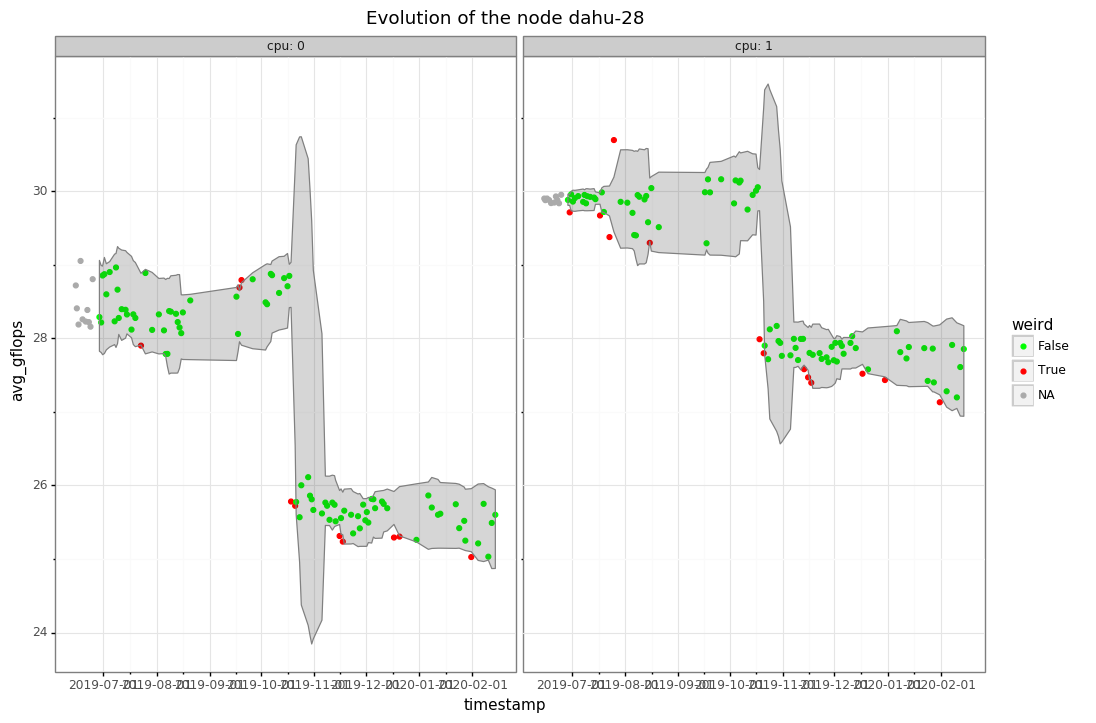

<ggplot: (-9223363247327005373)>


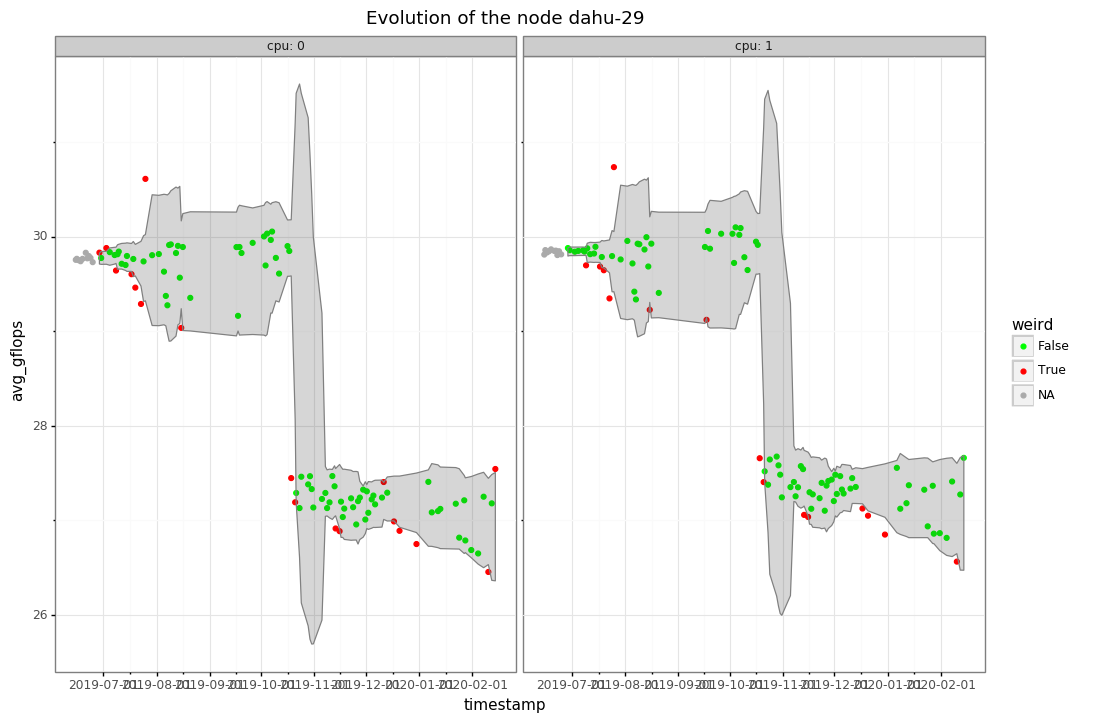

<ggplot: (-9223363247327097982)>


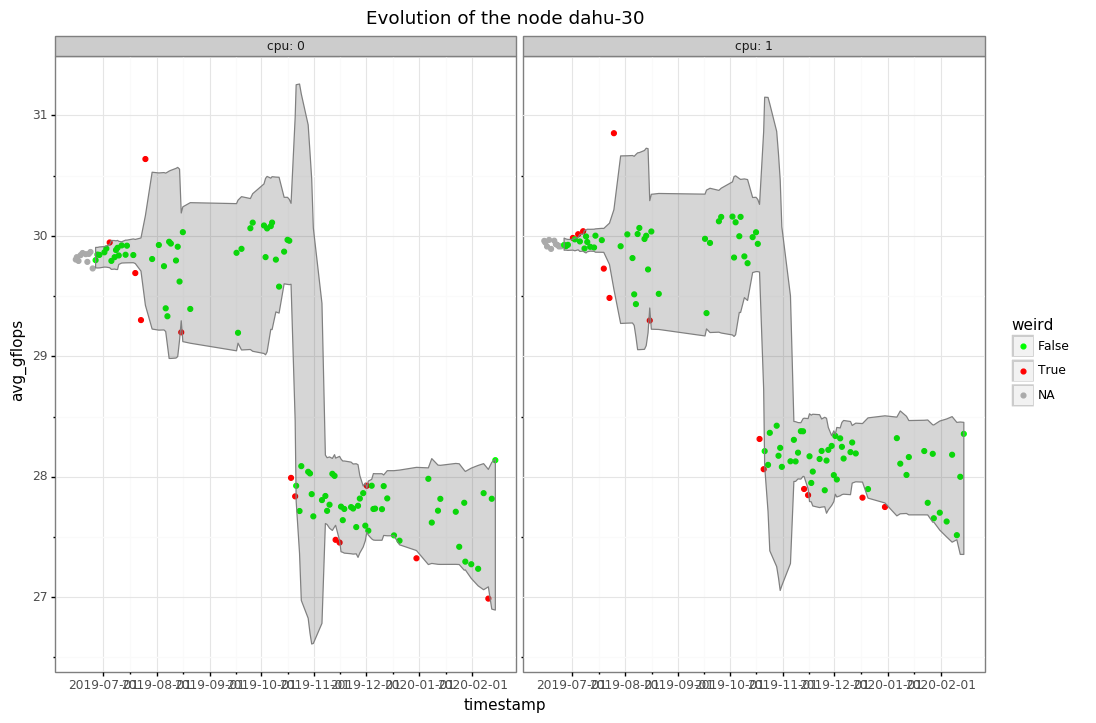

<ggplot: (8789527376469)>


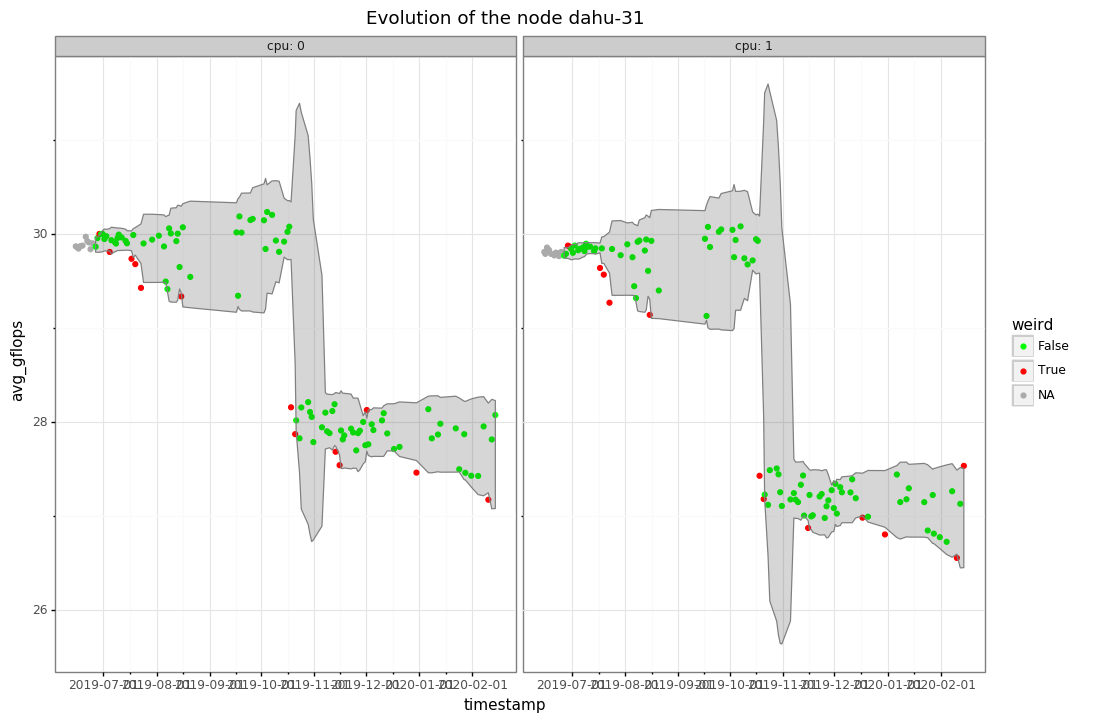

<ggplot: (8789527730966)>


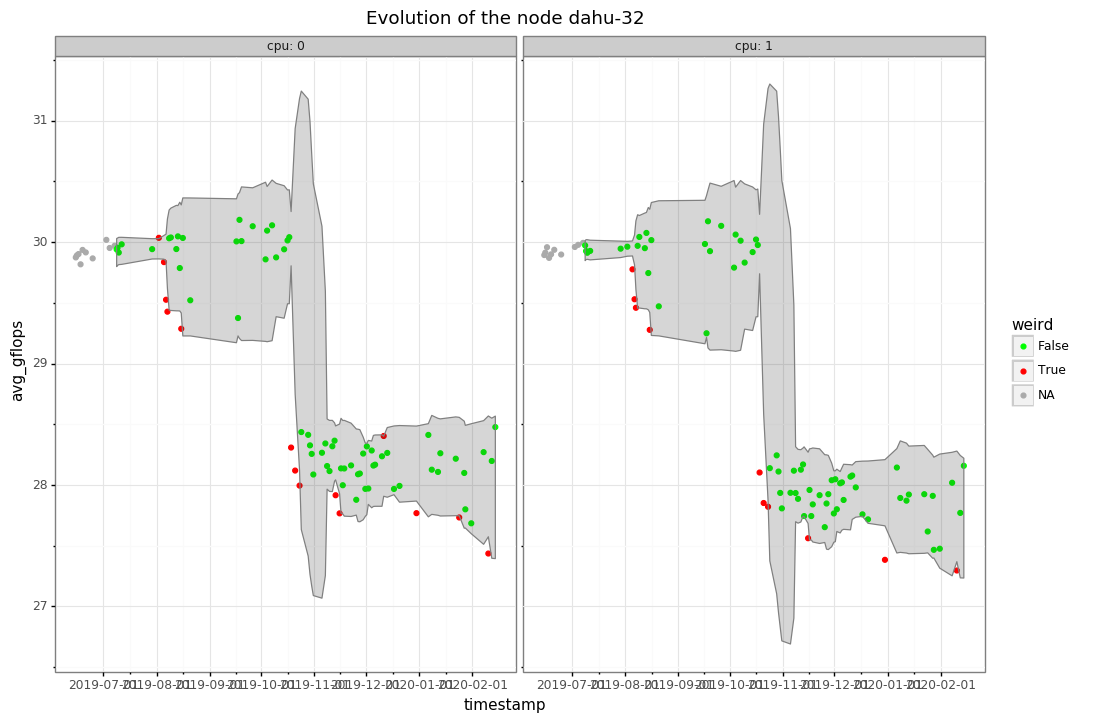

<ggplot: (-9223363247327070320)>


In [8]:
nrt.plot_evolution_cluster(marked, 'avg_gflops')